In [ ]:
OpenCV Blob Detection

OpenCV Blob Detection
Blob stands for Binary Large Object and refers to the connected pixel in the binary image. 
The term Large focuses on the object of a specific size, and that other small binary objects are usually noise.
There are three processes regarding BLOB analysis.

BLOB extraction
Blob extraction means to separate the BLOBs (objects) in a binary image.
A BLOB contains a group of connected pixels. We can determine whether two pixels are connected or not by the connectivity,
i.e., which pixels is neighbor of another pixel. There are two types of connectivity. The 8-connectivity and the 4-connectivity. 
The 8-connectivity is far better than 4-connectivity.

BLOB representation
BLOB representation is simply means that convert the BLOB into a few representative numbers. 
After the BLOB extraction, the next step is to classify the several BLOBs. There are two steps in the BLOB representation process. 
In the first step, each BLOB is denoted by several characteristics, and the second step is to apply some matching methods that compare 
the features of each BLOB.

BLOB classification
Here we determine the type of BLOB, for example, given BLOB is a circle or not. 
Here the question is how to define which BLOBs are circle and which are not based on their features that we described earlier. 

In [1]:
import cv2
import numpy as np

image = cv2.imread(r"C:/Users/PythonTeam/Downloads/download.jpg", cv2.IMREAD_GRAYSCALE)
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(image)
imagekey = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow("My Image", imagekey)
cv2.waitKey()

-1

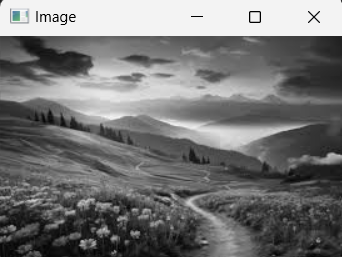

In [2]:
from IPython.display import Image,display
a=r"C:/Users/PythonTeam/Pictures/screenshots/Screenshot.png"
display(Image(filename=a))

In [ ]:
How to perform Background Subtraction?
Background subtraction is widely used to generating a foreground mask. 
The binary images contain the pixels which belong to moving objects in the scene. 
Background subtraction calculates the foreground mask and performs the subtraction between the current frame and background model.

There are two main steps in Background modeling

Background Initialization- In this step, an initial model of the background is computed.
Background Update- In this step, that model is updated that adapt the possible change in the scene.
Manual subtraction from the first frame
First, we import the libraries and load the video. Next, we take the first frame of the video, convert it into grayscale, 
and apply the Gaussian Blur to remove some noise. We use the while loop, so we load frame one by one. 
After doing this, we get the core part of the background of the subtraction where we calculate the absolute difference 
between the first frame and the current frame.

In [1]:
import cv2
import numpy as np

# Capture video from the webcam
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera")
    exit()

# Capture the first frame and convert it to grayscale
ret, first_frame = cap.read()
if not ret:
    print("Failed to capture the first frame")
    cap.release()
    cv2.destroyAllWindows()
    exit()

first_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
first_gray_blur = cv2.GaussianBlur(first_gray, (5, 5), 0)

while cap.isOpened():
    # Capture a new frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the new frame to grayscale and apply Gaussian blur
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_frame_blur = cv2.GaussianBlur(gray_frame, (5, 5), 0)

    # Compute the absolute difference between the initial and current frame
    difference = cv2.absdiff(first_gray_blur, gray_frame_blur)
    
    # Apply thresholding to get a binary mask
    _, thresholded = cv2.threshold(difference, 25, 255, cv2.THRESH_BINARY)

    # Display the thresholded mask
    cv2.imshow('Foreground Mask', thresholded)

    # Exit on pressing the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()
# Close all OpenCV windows
cv2.destroyAllWindows()


KeyboardInterrupt



In [1]:
from IPython.display import Video,display
a=r"C:/Users/PythonTeam/Videos/Screen Recordings/Screen Recording 2024-12-09 133213.mp4"
display(Video(filename=a))

In [ ]:
Subtraction using Subtractor MOG2
OpenCV provides the subtractor MOG2 which is effective than the manual mode. 
The Subtractor MOG2 has the benefit of working with the frame history. The syntax is as follows:

cv2.createBackgroundSubtractorMOG2(history, varTheshold, detectShadow)  
The first argument, history is the number of the last frame(by default 120).

The second argument, a varThreshold is the value that used when evaluating the difference to extract the background. 
A lower threshold will find more variation with the advantage of a noisier image.

The third argument, detectShadows is the functions of the algorithm which can remove the shadow if enabled.

In [ ]:
import cv2
import numpy as np
cap = cv2.VideoCapture(r"C:/Users/PythonTeam/Videos/Screen Recordings/Screen Recording 2024-12-09 133213.mp4")
if not cap.isOpened():
    exit()
subtractor = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    mask = subtractor.apply(frame)
    cv2.imshow("Frame", frame)
    cv2.imshow("mask", mask)
    key = cv2.waitKey()
    if key == 27:
        break
cap.release()
cv2.destroyAllWindows()

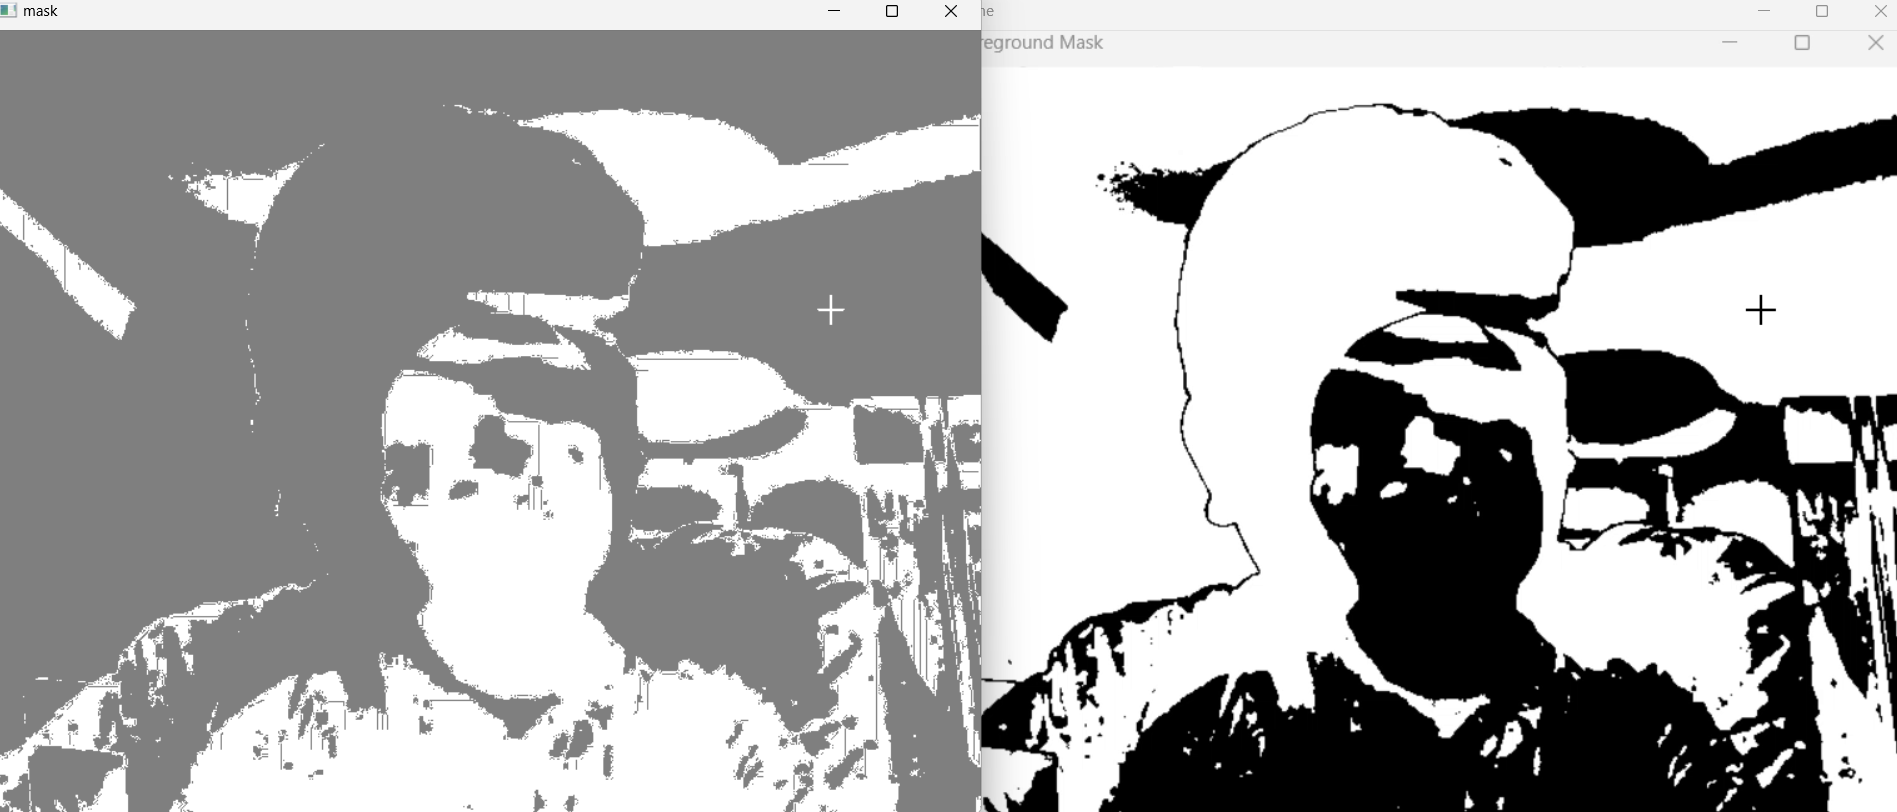

In [2]:
from IPython.display import Image,display
a=r"C:/Users/PythonTeam/Pictures/screenshots/Screenshot 2024-12-09 134846.png"
display(Image(filename=a))

In [ ]:
OpenCV Canny Edge Detection
Edge detection is term where identify the boundary of object in image.
We will learn about the edge detection using the canny edge detection technique. The syntax is canny edge detection function is given as:

edges = cv2.Canny('/path/to/img', minVal, maxVal, apertureSize, L2gradient)  
Parameters-
/path/to/img: file path of the image (required)
minVal: Minimum intensity gradient (required)
maxVal: Maximum intensity gradient (required)
aperture: It is optional argument.
L2gradient: Its default value is false, if value is true, Canny () uses a more 
computationally expensive equation to detect edges, which provides more accuracy at the cost of resources.

In [4]:
import cv2
image=cv2.imread(r"C:/Users/PythonTeam/Downloads/download.jpg")
edges=cv2.Canny(image,100,200)
cv2.imshow('Detected Image',edges)
cv2.imshow('Original Image',image)
cv2.waitKey()
cv2.destroyAllWindows()

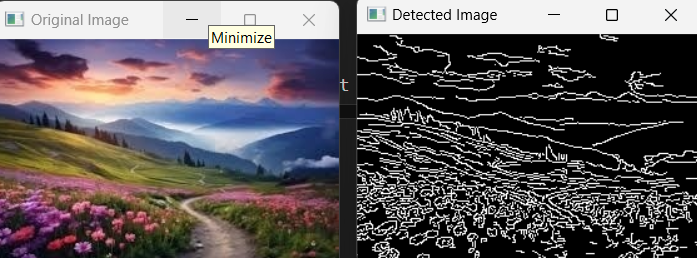

In [7]:
from IPython.display import Image,display
a=r"C:/Users/PythonTeam/Pictures/screenshots/Screenshot 2024-12-09 140038.png"
display(Image(filename=a))

In [6]:
import cv2
image=cv2.imread(r"C:/Users/PythonTeam/Downloads/rc390_3pm.jpg")
edges=cv2.Canny(image,100,200)
cv2.imshow('Original Image',image)
cv2.imshow('Detected Image',edges)
cv2.waitKey()
cv2.destroyAllWindows()

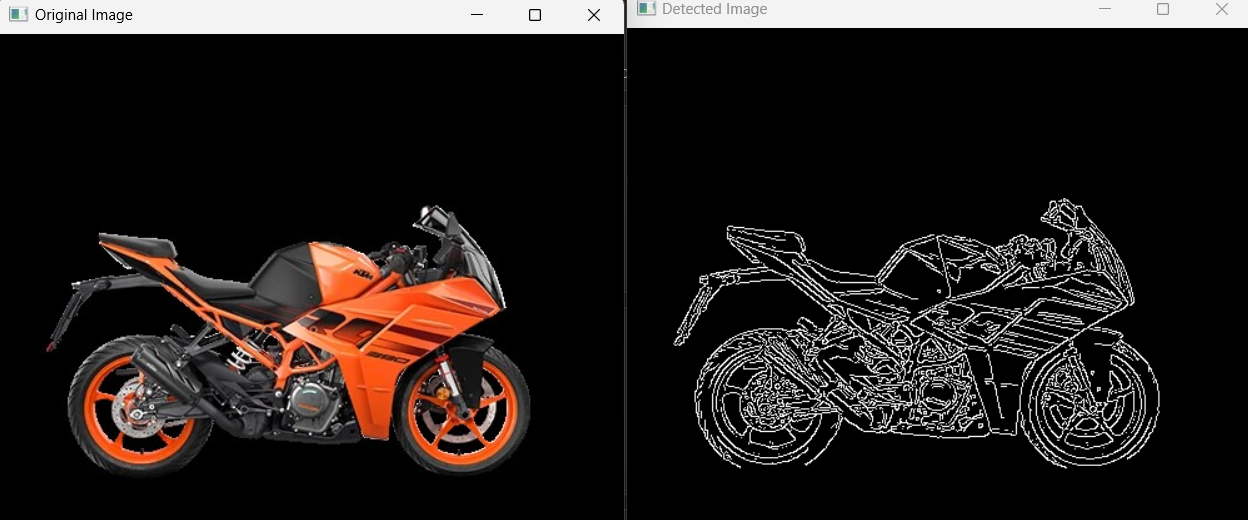

In [9]:
from IPython.display import Image,display
a=r"C:/Users/PythonTeam/Pictures/screenshots/Screenshot 2024-12-09 140452.png"
display(Image(filename=a))

In [12]:
import cv2
image=cv2.imread(r"C:/Users/PythonTeam/Downloads/113447727.jpg")
edges=cv2.Canny(image,100,200)
cv2.imshow('Original Image',image)
cv2.imshow('Detected Image',edges)
cv2.waitKey()
cv2.destroyAllWindows()

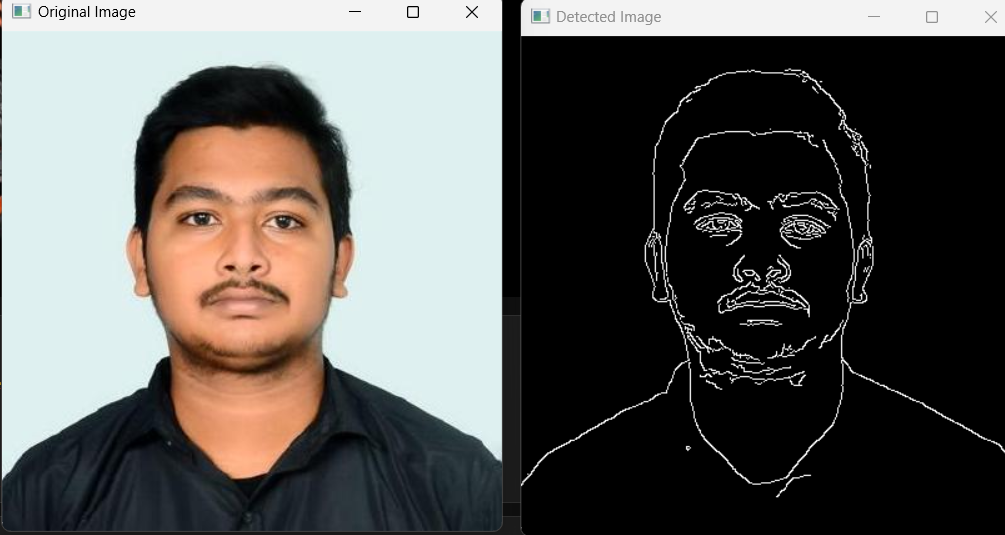

In [16]:
from IPython.display import Image,display
a=r"C:/Users/PythonTeam/Pictures/screenshots/Screenshot 2024-12-09 144806.png"
display(Image(filename=a))

In [ ]:
Real Time Edge Detection

In [ ]:
BGR to HSV refers to the conversion of an image from the BGR (Blue, Green, Red) color space to the HSV (Hue, Saturation, Value) color space.

In [ ]:
import cv2
import numpy as np
cap=cv2.VideoCapture(0)
while(1):
    ret,frame=cap.read()
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    lower_red=np.array([30,150,50])
    upper_red=np.array([255,255,180])
    mask=cv2.inRange(hsv,lower_red,upper_red)
    res=cv2.bitwise_and(frame,frame,mask=mask)
    cv2.imshow('Original image',frame)
    edges=cv2.Canny(frame,100,200)
    cv2.imshow('Detected image',edges)
    k=cv2.waitKey()%0xff
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()

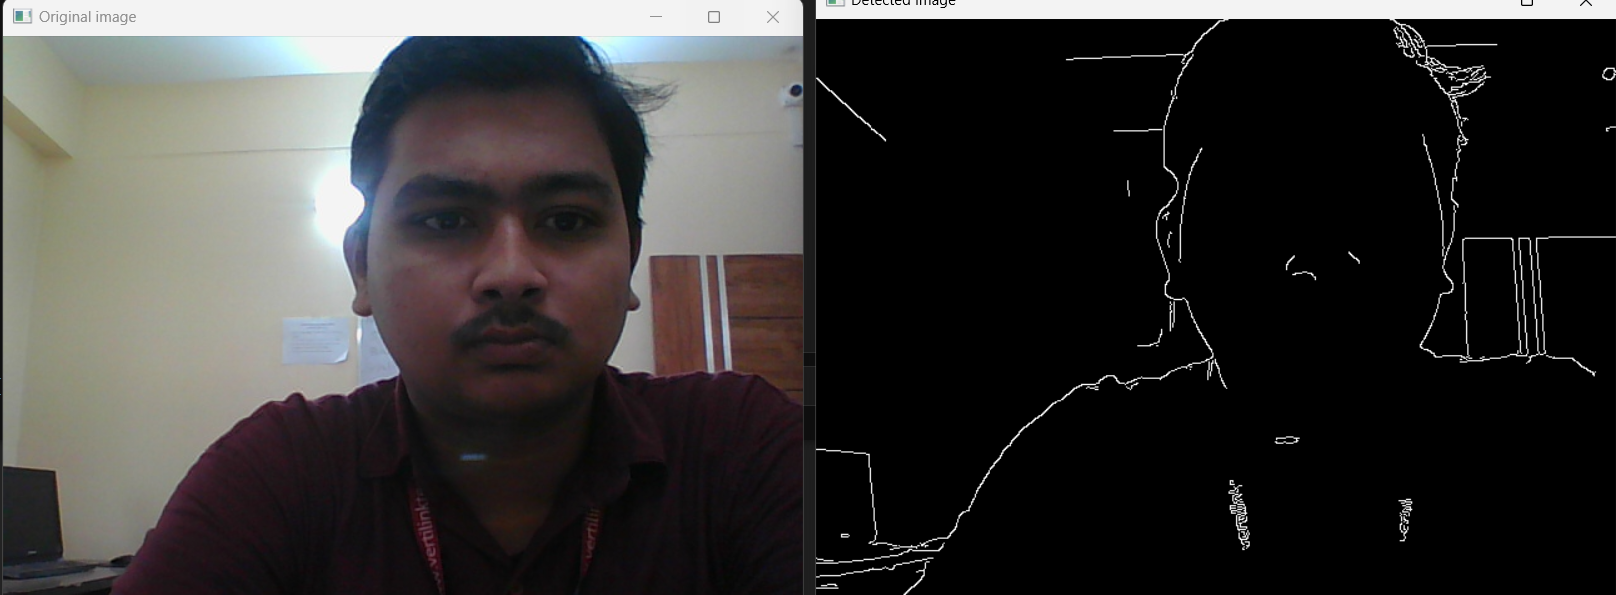

In [2]:
from IPython.display import Image,display
a=r"C:/Users/PythonTeam/Pictures/screenshots/Screenshot 2024-12-10 103833.png"
display(Image(filename=a))

In [ ]:
OpenCV Blur (Image Smoothing)
Blurring is the commonly used technique for image processing to removing the noise. 
It is generally used to eliminate the high-frequency content such as noise, edges in the image. 
The edges are being blurred when we apply blur to the image. The advantages of blurring are the following:

Advantages of Blurring
The benefits of blurring are the following:

It removes low-intensity edges.
It helps in smoothing the image.
It is beneficial in hiding the details; for example, blurring is required in many cases, such as police intentionally want to hide the victim's face.
OpenCV provides mainly the following type of blurring techniques.

OpenCV Averaging
In this technique, the image is convolved with a box filter (normalize).
It calculates the average of all the pixels which are under the kernel area and replaces the central element with the calculated average. 
OpenCV provides the cv2.blur() or cv2.boxFilter() to perform this operation. We should define the width and height of the kernel. 
The syntax of cv2.blur() function is following.
cv2.blur(src, dst, ksize, anchor, borderType)  
Parameters:
src - It represents the source (input) image.
dst - It represents the destination (output) image.
ksize - It represents the size of the kernel.
anchor - It denotes the anchor points.
borderType - It represents the type of border to be used to the output.

In [4]:
import cv2
image=cv2.imread(r"C:/Users/PythonTeam/Downloads/113447727.jpg")
cv2.imshow('Original Image',image)
cv2.imshow('Blur Image',cv2.blur(image,(5,5)))
cv2.waitKey()
cv2.destroyAllWindows()

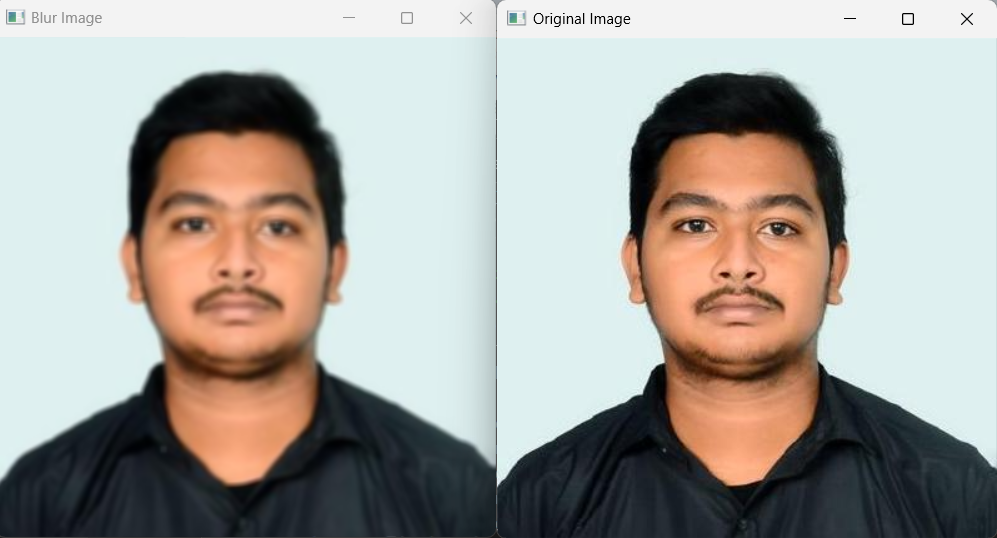

In [6]:
from IPython.display import Image,display
a=r"C:/Users/PythonTeam/Pictures/screenshots/Screenshot 2024-12-10 105157.png"
display(Image(filename=a))

In [5]:
import cv2
image=cv2.imread(r"C:/Users/PythonTeam/Downloads/113447727.jpg")
cv2.imshow('Original Image',image)
cv2.imshow('Blur Image',cv2.blur(image,(10,10)))
cv2.waitKey()
cv2.destroyAllWindows()

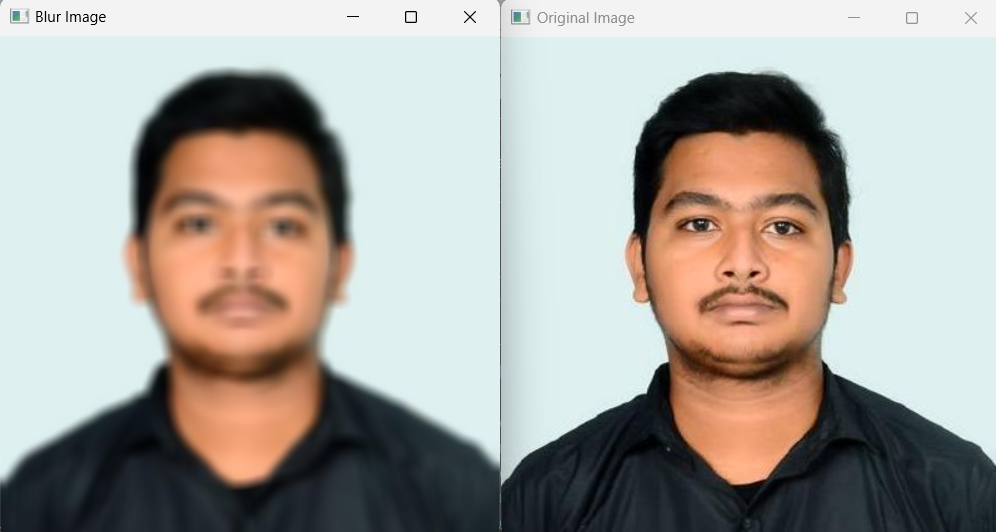

In [7]:
from IPython.display import Image,display
a=r"C:/Users/PythonTeam/Pictures/screenshots/Screenshot 2024-12-10 105215.png"
display(Image(filename=a))

In [ ]:
OpenCV Median Blur
The median blur operation is quite similar to the Gaussian blur. OpenCV provides the medianblur() function to perform the blur operation. 
It takes the median of all the pixels under the kernel area, and the central element is replaced with this median value. 
It is extremely effective for the salt-and-paper noise in the image. The kernel size should be a positive odd integer. 
Following is the syntax of this method.

cv2.medianBlur(src, dst, ksize)  
Parameters:
src- It represents the source (input image).

dst - It represents the destination (output image).

ksize - It represents the size of the kernel.

In [11]:
import cv2
import numpy as np
image=cv2.imread(r"C:/Users/PythonTeam/Downloads/113447727.jpg")
dst=median=cv2.medianBlur(image,5)
cv2.imshow("Medium Blur Image",np.hstack((image,dst)))
cv2.waitKey()
cv2.destroyAllWindows()

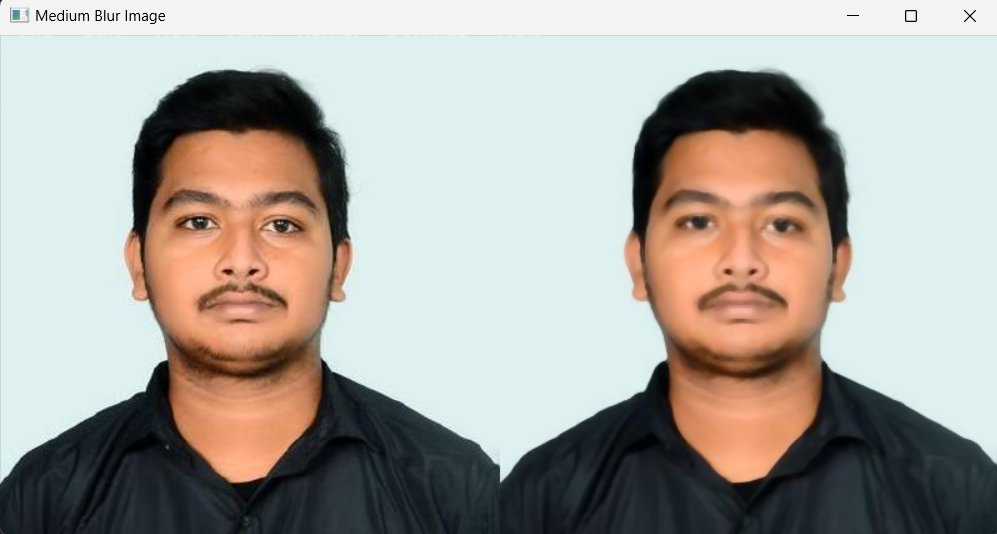

In [12]:
from IPython.display import Image,display
a=r"C:/Users/PythonTeam/Pictures/screenshots/Screenshot 2024-12-10 110617.png"
display(Image(filename=a))

In [ ]:
OpenCV Gaussian Blur
Image smoothing is a technique which helps in reducing the noise in the images. 
Image may contain various type of noise because of camera sensor. 
It basically eliminates the high frequency (noise, edge) content from the image so edges are slightly blurred in this operation. 
OpenCV provide gaussianblur() function to apply smoothing on the images. The syntax is following:

dst=cv2.GuassiasBlur(src, ksize, sigmaX[,dst[,sigmaY[, borderType=BORDER_DEFAULT]]]  
Parameters:
src -It is used to input an Image.
dst -It is a variable which stores an output Image.
ksize -It defines the Gaussian Kernel Size[height width ]. Height and width must be odd (1,3,5,..) and can have different values. 
If ksize is set to [0,0], then ksize is computed from sigma value.
sigmaX - Kernel standard derivation along X-axis.(horizontal direction).
sigmaY - Kernel standard derivation along Y-axis (vertical direction). If sigmaY = 0 then sigmaX value is taken for sigmaY.
borderType - These are the specified image boundaries while the kernel is applied on the image borders. Possible border type is:

cv.BORDER_CONSTANT
cv.BORDER_REPLICATE
cv.BORDER_REFLECT
cv.BORDER_WRAP
cv.BORDER_REFLECT_101
cv.BORDER_TRANSPARENT
cv.BORDER_REFLECT101
cv.BORDER_DEFAULT
cv.BORDER_ISOLATED

In [14]:
import numpy as np
import cv2
image=cv2.imread(r"C:/Users/PythonTeam/Downloads/113447727.jpg",1)
dst=cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)
cv2.imshow('Guassian Blur',np.hstack((image,dst)))
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
import cv2
import numpy as np
image=cv2.imread(r"C:/Users/PythonTeam/Downloads/113447727.jpg",1)
cv2.imshow('Guassian Blur',cv2.BORDER_TRANSPARENT)
cv2.imshow('Guassian Blur',cv2.BORDER_ISOLATED)
cv2.imshow('Guassian Blur',cv2.BORDER_REFLECT_101)
cv2.imshow('Guassian Blur',cv2.BORDER_REFLECT101)
cv2.imshow('Guassian Blur',cv2.BORDER_REFLECT)
cv2.imshow('Guassian Blur',cv2.BORDER_WRAP)
cv2.imshow('Guassian Blur',cv2.BORDER_REPLICATE)
cv2.imshow('Guassian Blur',cv2.BORDER_CONSTANT)
cv2.imshow('Guassian Blur',cv2.BORDER_DEFAULT)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
but it is not work properly. check the border_types one by one

In [ ]:
hence it is known as Blob and Edge Detection and Blur Image Detection.